# Lesson 8.03 ARIMA

## What is ARIMA?

- ARIMA stands for Autoregressive Integrated Moving Average
- It is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 
- `AR` refers to later values predicted by earlier / lagged values
- `I` refers to absolute values replaced by difference values e.g. % change in stock price
- `MA` refers to linear combinations of current and previous values


## What is SARIMA?
- `S`easonal component added to `ARIMA`
- `S` refers to seasonal correlation and can identify the seasonality of the time series
- `SARIMA` is used for non-stationary series, that is, where the data do not fluctuate around the same mean, variance and co-variance. 
- `SARIMA` can also identify trend and seasonality

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import itertools
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Data

In [2]:
# More info on data set can be found at https://data.gov.sg/dataset/container-throughput-monthly-total
data = pd.read_csv('container-throughput-monthly.csv')

## Build SARIMA Model

Now, let's take a look at how the SARIMA model will perform for the same dataset. The model's notation is SARIMA(p, d, q).(P,D,Q)lag. These three parameters account for seasonality, trend, and noise in data. 
   
I tried to calculate the AIC (Akaike information criterion) which is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. We need to select the best combination, that delivers the lowest AIC value. The following program will determine the optimal triplet needed to give the best (P,D,Q) combination between 0 and 2. We will use the itertools library for this short piece of code.

### More Info on AIC
AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. The low AIC value the better. Our output suggests that SARIMAX(0, 0, 1)x(1, 1, 1, 12) with AIC value of 3521.66 is the best combination, so we should consider this to be optimal option.

In [3]:
# Define the p, d, and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

lowest_aic = float('inf')  # Initialize lowest AIC with infinity

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['container_throughput'],
                                            order=param, 
                                            seasonal_order=param_seasonal
                                            )

            results = mod.fit()

            aic = results.aic
            
            # Update lowest AIC if a lower value is found
            if aic < lowest_aic:
                lowest_aic = aic  

                best_param = param
                best_param_seasonal = param_seasonal

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5864.2300473690775
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5486.276989252639
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4131.716994474513
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4133.466129170659
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4353.333842968388
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4355.113953719672
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4133.452577919051
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4102.709789806966
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5463.624234380693
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5091.352834134883
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3902.818873205324
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3903.0289522553767
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4538.3796181584
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4148.6184636158605
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3903.0451326084494
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3905.02654439986
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4011.300135263131
ARIMA(0, 1, 0)x(0, 

C:\Users\Kishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3689.6301169321196
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3585.728298872999
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3534.9486961551697
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3922.093591847358
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3830.3248420099253
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3641.888202744854
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:3522.6114490535097
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3743.033148521013
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3666.6491591018093
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3579.2759830897903
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3522.66209534511
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3921.36099728895
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3831.676650472373
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3643.6682859013918
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3523.662756687374
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3746.9853899177715
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3673.825755259393
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3580.974014887055
ARIM

In [4]:
# Print the ARIMA model with the lowest AIC
print('\nBest model:')
print('ARIMA{}x{}12 - AIC:{}'.format(best_param, best_param_seasonal, lowest_aic))


Best model:
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3521.6627958281338


In [5]:
# in the “mod = sm.tsa.statespace.SARIMAX” command we need to set up the chosen combination.
best_model = SARIMAX(data['container_throughput'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()

# Optional - if you are keen to see the actual statistcal results of best model
#print(best_model.summary())

## Model Forecast

In the forecast step, we will try to predict the Container Throughput for the next 120 steps i.e. 10 years.

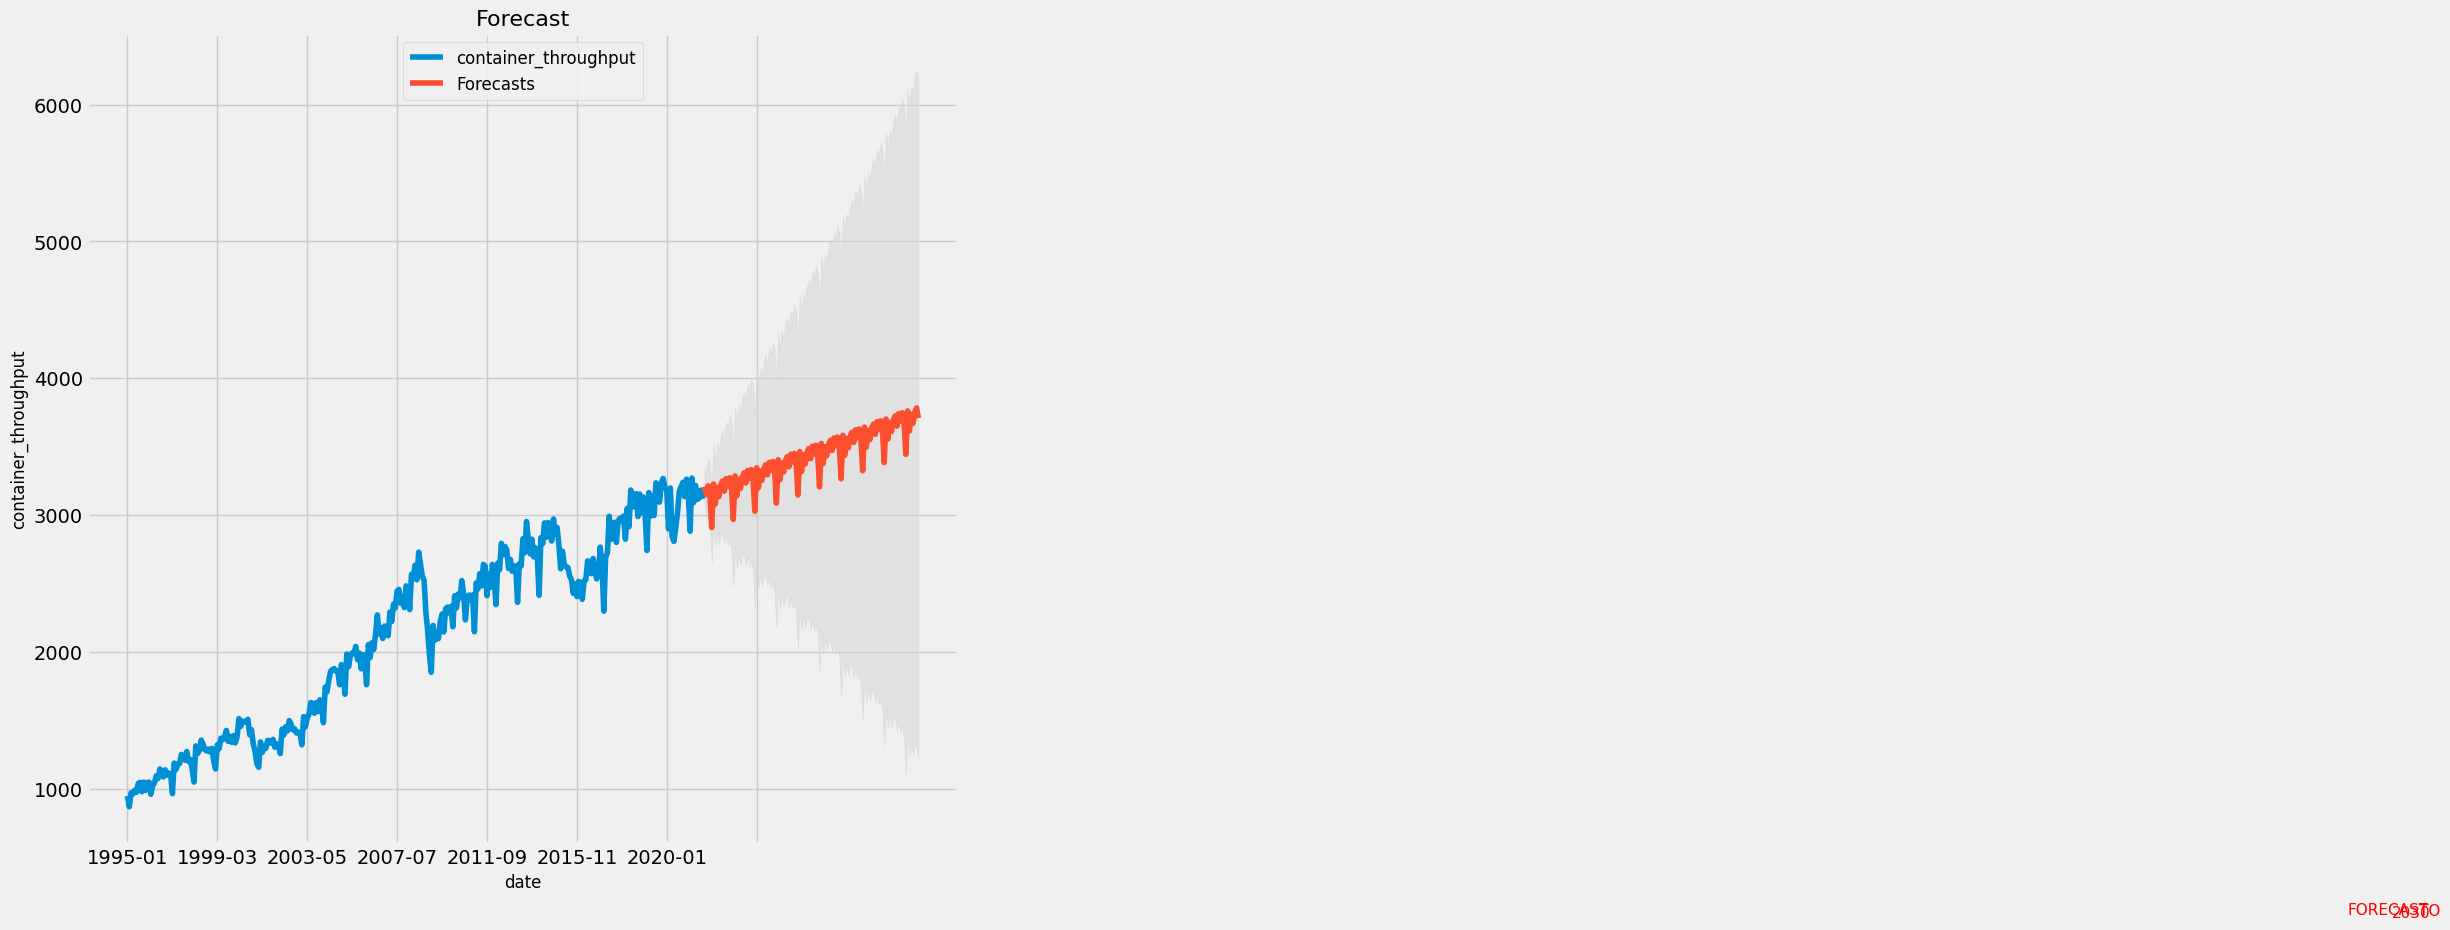

In [6]:
#Forecasting 10 years (120 months) ahead
forecast_values = best_model.get_forecast(steps = 120)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = data.plot(x='date' ,y='container_throughput', figsize = (10, 10), legend = True)

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecasts', figsize = (10, 10), grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='#D3D3D3', alpha = .5)
plt.title("Forecast", size=16)
plt.ylabel('container_throughput', size=12)
plt.xlabel('date', size=12)
plt.legend(loc='upper center', prop={'size': 12})
#annotation
ax.text(1235, 82, 'FORECAST', fontsize=11,  color='RED')
ax.text(1275, 72, 'TO', fontsize=11,  color='RED')
ax.text(1260, 62, '2030', fontsize=11,  color='RED')
plt.show()

## Evaluate Model Performance

- To evaluate the model performance, we calculate the R-squared score and the root mean square error of my dataset to test the authenticity of the model. 
- The model has 92% accuracy (R-squared) which is fairly decent. 
- Mean Absolute Percentage Error of the model is 4% and is relatively low enough for us to be fairly confident about the model's ability to predict accurately in the future. 

In [7]:
#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = data[:int(0.52*(len(data)))]
test = data[int(0.52*(len(data))):]

# establish the earliest month and latest month of the test data set
start=len(train)
end=len(train)+len(test)-1

predictions = best_model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

evaluation_results = pd.DataFrame({'r2_score': r2_score(test['container_throughput'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['container_throughput'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['container_throughput'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs((test['container_throughput'] - predictions)/test['container_throughput']))*100
evaluation_results

,r2_score,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.920646,71.346504,90.156096,2.680893


Finally, we compare the actual vs. predicted values to get a clear understanding of the effectiveness of our model. 

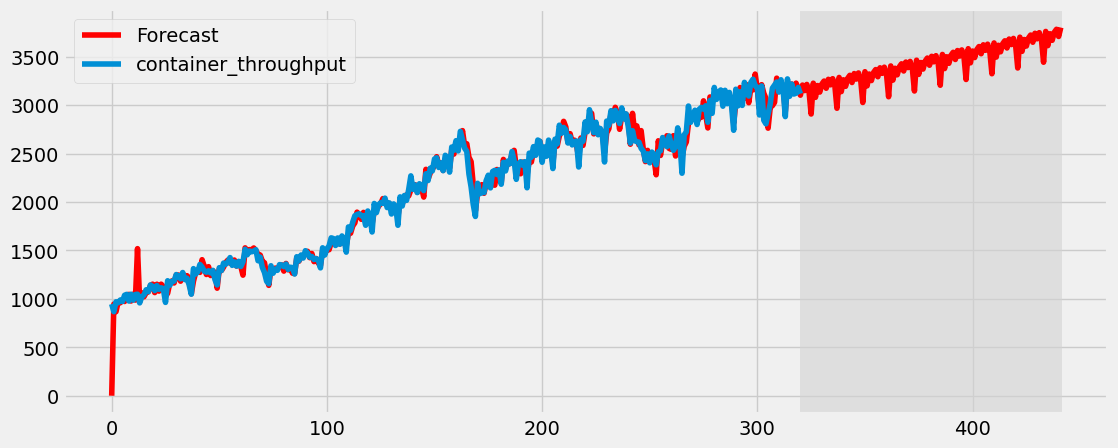

In [8]:
data['sarima_model'] = best_model.fittedvalues

# forecast for entire data set = actual values in data set + future forecasted values
forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 120)
forecast = data['sarima_model'].append(forecast)

plt.figure(figsize=(12, 5))
plt.plot(forecast, color='r', label='Forecast')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.6, color='lightgrey')
plt.plot(data['container_throughput'], label='container_throughput')

plt.legend()
plt.show()